In [ ]:
pip install pandas scikit-learn transformers datasets torch matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 49.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 42.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 51.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 36.0 MB/s eta 0:00:0000:0100:01
   ━

In [ ]:
pip install transformers datasets scikit-learn numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install transformers[torch]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.3/336.3 kB 16.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 29.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install protobuf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 22.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch
from sklearn.metrics import classification_report
import pandas as pd

df_human = pd.read_csv("human.csv")
df_ai = pd.read_csv("ai.csv")
df_paraphrased = pd.read_csv("paraphrased.csv")

df_human['label'] = 0
df_ai['label'] = 1
df_paraphrased['label'] = 2

# only abstract and label columns are required
df_human = df_human[['abstract', 'label']]
df_ai = df_ai[['abstract', 'label']]
df_paraphrased = df_paraphrased[['abstract', 'label']]

#combining all csv
df = pd.concat([df_human, df_ai, df_paraphrased], ignore_index=True)

# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

#to check count of each class to ensure it is balanced
print(df['label'].value_counts())

#dataset split into 80% train and 20% test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print(f"Training Set Size: {len(train_df)}")
print(f"Test Set Size: {len(test_df)}")


/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


label
1    15395
2    15395
0    15391
Name: count, dtype: int64
Training Set Size: 36944
Test Set Size: 9237


In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU instead.")

Using GPU: NVIDIA GeForce RTX 4090


Map: 100%|██████████| 9237/9237 [00:09<00:00, 936.29 examples/s]
/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Running with the following hyperparameters: lr=2e-05, batch_size=8, epochs=3, weight_decay=0.01


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss,Accuracy,F1 Macro
500,0.471800,0.778895,0.754899,0.745213
1000,0.413800,1.243643,0.711270,0.685195
1500,0.344100,0.603005,0.869330,0.867945
2000,0.313200,0.702678,0.843997,0.842479
2500,0.275100,0.961353,0.825593,0.820448
3000,0.247300,0.567680,0.890008,0.888590
3500,0.349400,0.387325,0.914258,0.913703
4000,0.284200,0.305980,0.927574,0.927221
4500,0.272500,0.420407,0.907979,0.907214
5000,0.119200,0.559300,0.902782,0.902084


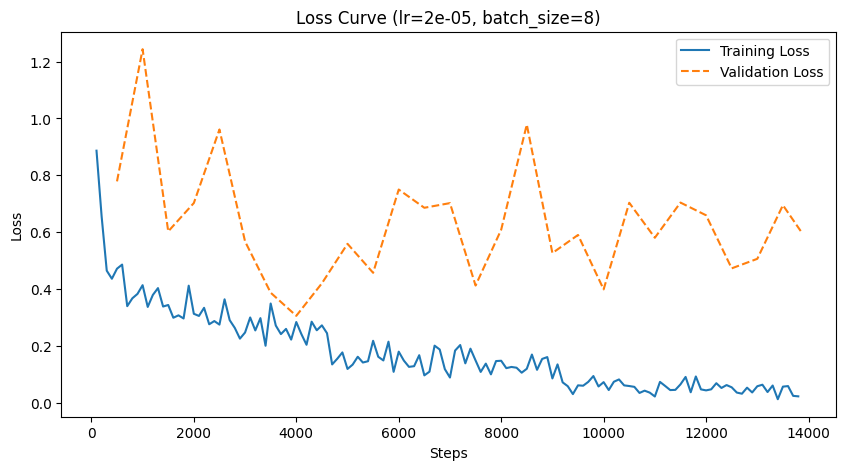

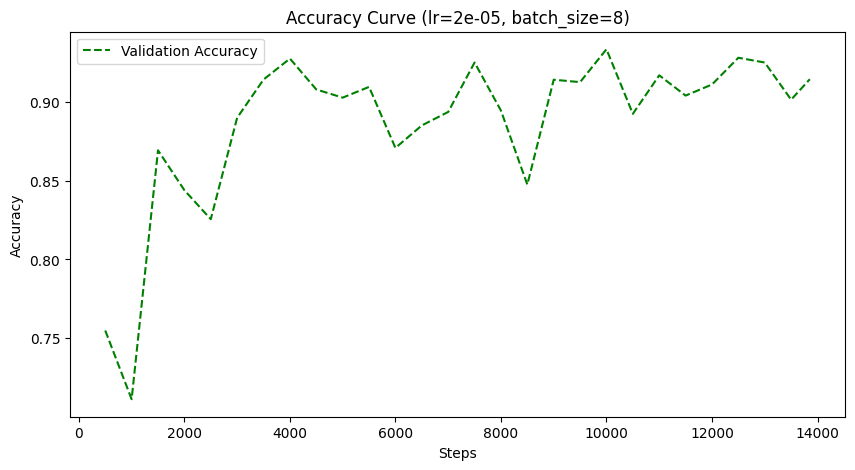

In [ ]:
import pandas as pd
from transformers import Trainer, TrainingArguments
from sklearn.metrics import classification_report
from datasets import DatasetDict, Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import numpy as np
import os
import matplotlib.pyplot as plt

os.environ["WANDB_DISABLED"] = "true"

# Given hyperparameters (instead of grid search)
learning_rate = 2e-5
batch_size = 8
num_epochs = 3
weight_decay = 0.01

# Tokenizer and dataset setup
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_function(examples):
    return tokenizer(examples['abstract'], padding="max_length", truncation=True, max_length=512)

# Load dataset (replace `train_df` and `test_df` with your actual DataFrame variables)
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

dataset = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Store the results
results = []

# Set hyperparameters directly
print(f"Running with the following hyperparameters: lr={learning_rate}, batch_size={batch_size}, epochs={num_epochs}, weight_decay={weight_decay}")

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="steps",
    eval_steps=500,
    logging_dir='./logs',
    logging_steps=100,
    save_strategy="epoch",
    learning_rate=learning_rate,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=weight_decay,
    disable_tqdm=False
)

# Model initialization
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=3)

# Define custom compute metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    report = classification_report(labels, predictions, output_dict=True)
    metrics = {
        "accuracy": report["accuracy"],
        "f1_macro": report["macro avg"]["f1-score"]
    }
    return metrics

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    compute_metrics=compute_metrics
)

# Train and save history
trainer.train()
history = trainer.state.log_history

# Evaluate
eval_results = trainer.evaluate()
predictions = trainer.predict(tokenized_datasets['test'])
preds = predictions.predictions.argmax(axis=-1)
report = classification_report(tokenized_datasets['test']['label'], preds, output_dict=True)

# Save results
results.append({
    "learning_rate": learning_rate,
    "batch_size": batch_size,
    "num_epochs": num_epochs,
    "weight_decay": weight_decay,
    "accuracy": report["accuracy"],
    "f1_macro": report["macro avg"]["f1-score"]
})

# Plot training/validation loss and accuracy
steps = [log.get("step", 0) for log in history if "loss" in log]
training_loss = [log.get("loss", None) for log in history if "loss" in log]
eval_steps = [log.get("step", 0) for log in history if "eval_loss" in log]
eval_loss = [log.get("eval_loss", None) for log in history if "eval_loss" in log]
eval_accuracy = [log.get("eval_accuracy", None) for log in history if "eval_accuracy" in log]

# Plot loss curve
plt.figure(figsize=(10, 5))
plt.plot(steps, training_loss, label="Training Loss")
plt.plot(eval_steps, eval_loss, label="Validation Loss", linestyle="--")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title(f"Loss Curve (lr={learning_rate}, batch_size={batch_size})")
plt.legend()
plt.savefig(f"loss_curve_roberta_lr{learning_rate}_bs{batch_size}.png")
plt.show()

# Plot accuracy curve
if eval_accuracy:
    plt.figure(figsize=(10, 5))
    plt.plot(eval_steps, eval_accuracy, label="Validation Accuracy", linestyle="--", color="g")
    plt.xlabel("Steps")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy Curve (lr={learning_rate}, batch_size={batch_size})")
    plt.legend()
    plt.savefig(f"accuracy_curve_roberta_lr{learning_rate}_bs{batch_size}.png")
    plt.show()


In [ ]:
# Extract true labels and predicted values
true_labels = tokenized_datasets['test']['label']
predicted_labels = preds  # Obtained from predictions.predictions.argmax(axis=-1)

# Generate classification report
final_report = classification_report(true_labels, predicted_labels, output_dict=True)

# Print the classification report
print("Final Classification Report:")
print(classification_report(true_labels, predicted_labels))



Final Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      3059
           1       0.92      1.00      0.96      3088
           2       0.85      0.92      0.88      3090

    accuracy                           0.91      9237
   macro avg       0.92      0.91      0.91      9237
weighted avg       0.92      0.91      0.91      9237



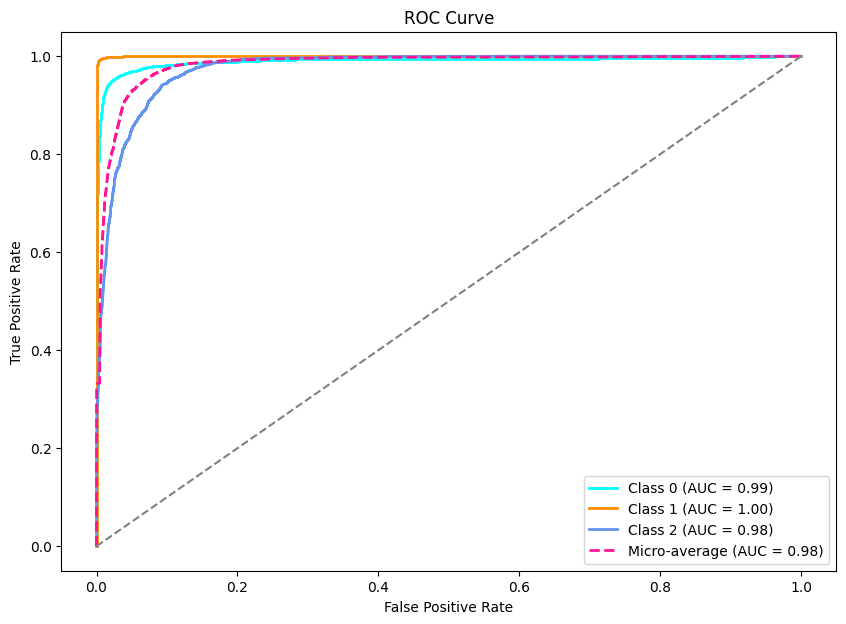

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels for ROC calculation
true_labels = np.array(tokenized_datasets['test']['label'])
num_classes = len(np.unique(true_labels))
binarized_labels = label_binarize(true_labels, classes=range(num_classes))

# Get probabilities for each class
class_probs = predictions.predictions  # Shape: (num_samples, num_classes)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_labels[:, i], class_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(binarized_labels.ravel(), class_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(10, 7))
colors = cycle(["aqua", "darkorange", "cornflowerblue", "green", "red"])
for i, color in zip(range(num_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label=f"Class {i} (AUC = {roc_auc[i]:.2f})",
    )
plt.plot(fpr["micro"], tpr["micro"], color="deeppink", linestyle="--",
         label=f"Micro-average (AUC = {roc_auc['micro']:.2f})", lw=2)

plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.savefig("roc_curve.png")
plt.show()
